# Analyse Nino3.4 variance

Use preprocessed NINO34 average time series

CanESM5
MIROC6
CESM2

TODO: why is there a low value in the first timestep for CESM2??????

## Setup
### load required packages

In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py (only works with custom environment)
# import cdo
# cdo = cdo.Cdo() #

# colors for lines (color blind friendly colors: https://gist.github.com/thriveth/8560036)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    


## set paths

In [49]:
# directories with processed output
basedir_processed_NINO34 = '/glade/scratch/milinski/ESGF_downloads/NINO34/'

# directory for saving plots
plotdir = './plots/nino34/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## load MIROC6

In [56]:
var = 'tos'
model = 'MIROC6'
experiment = 'historical'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_Omon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 51.25it/s]


In [59]:
var = 'tos'
model = 'MIROC6'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 142.15it/s]


In [60]:
miroc6_nino34 = xr.concat([miroc6_historical_nino34,miroc6_ssp585_nino34],dim='time')[var]

## load CanESM5

In [66]:
var = 'tos'
model = 'CanESM5'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:01<00:00, 36.54it/s]


In [67]:
var = 'tos'
model = 'CanESM5'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 65.77it/s]


In [68]:
canesm5_nino34 = xr.concat([canesm5_historical_nino34,canesm5_ssp585_nino34],dim='time')[var]

## load CESM2-LENS

In [69]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BHISTcmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)

cesm2_historical_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 50/50 [00:01<00:00, 29.87it/s]


In [70]:
# remove the member that is not available for ssp370 from historical so that timeseries can be merged
cesm2_historical_nino34 = cesm2_historical_nino34['SST'][list(np.arange(0,10))+list(np.arange(11,50)),:] 

In [71]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BSSP370cmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(list(np.arange(1,11))+list(np.arange(12,51))):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).SST.squeeze()
    ds.append(member)
#     print(len(member['time']))
#

cesm2_ssp370_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 49/49 [00:01<00:00, 42.16it/s]


In [81]:
cesm2_nino34 = xr.concat([cesm2_historical_nino34,cesm2_ssp370_nino34],dim='time')
cesm2_nino34 = cesm2_nino34-273.15 # K to °C

## compute DJF statistics

In [82]:
canesm5_nino34_DJF = canesm5_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
miroc6_nino34_DJF = miroc6_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
cesm2_nino34_DJF = cesm2_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3

## plots

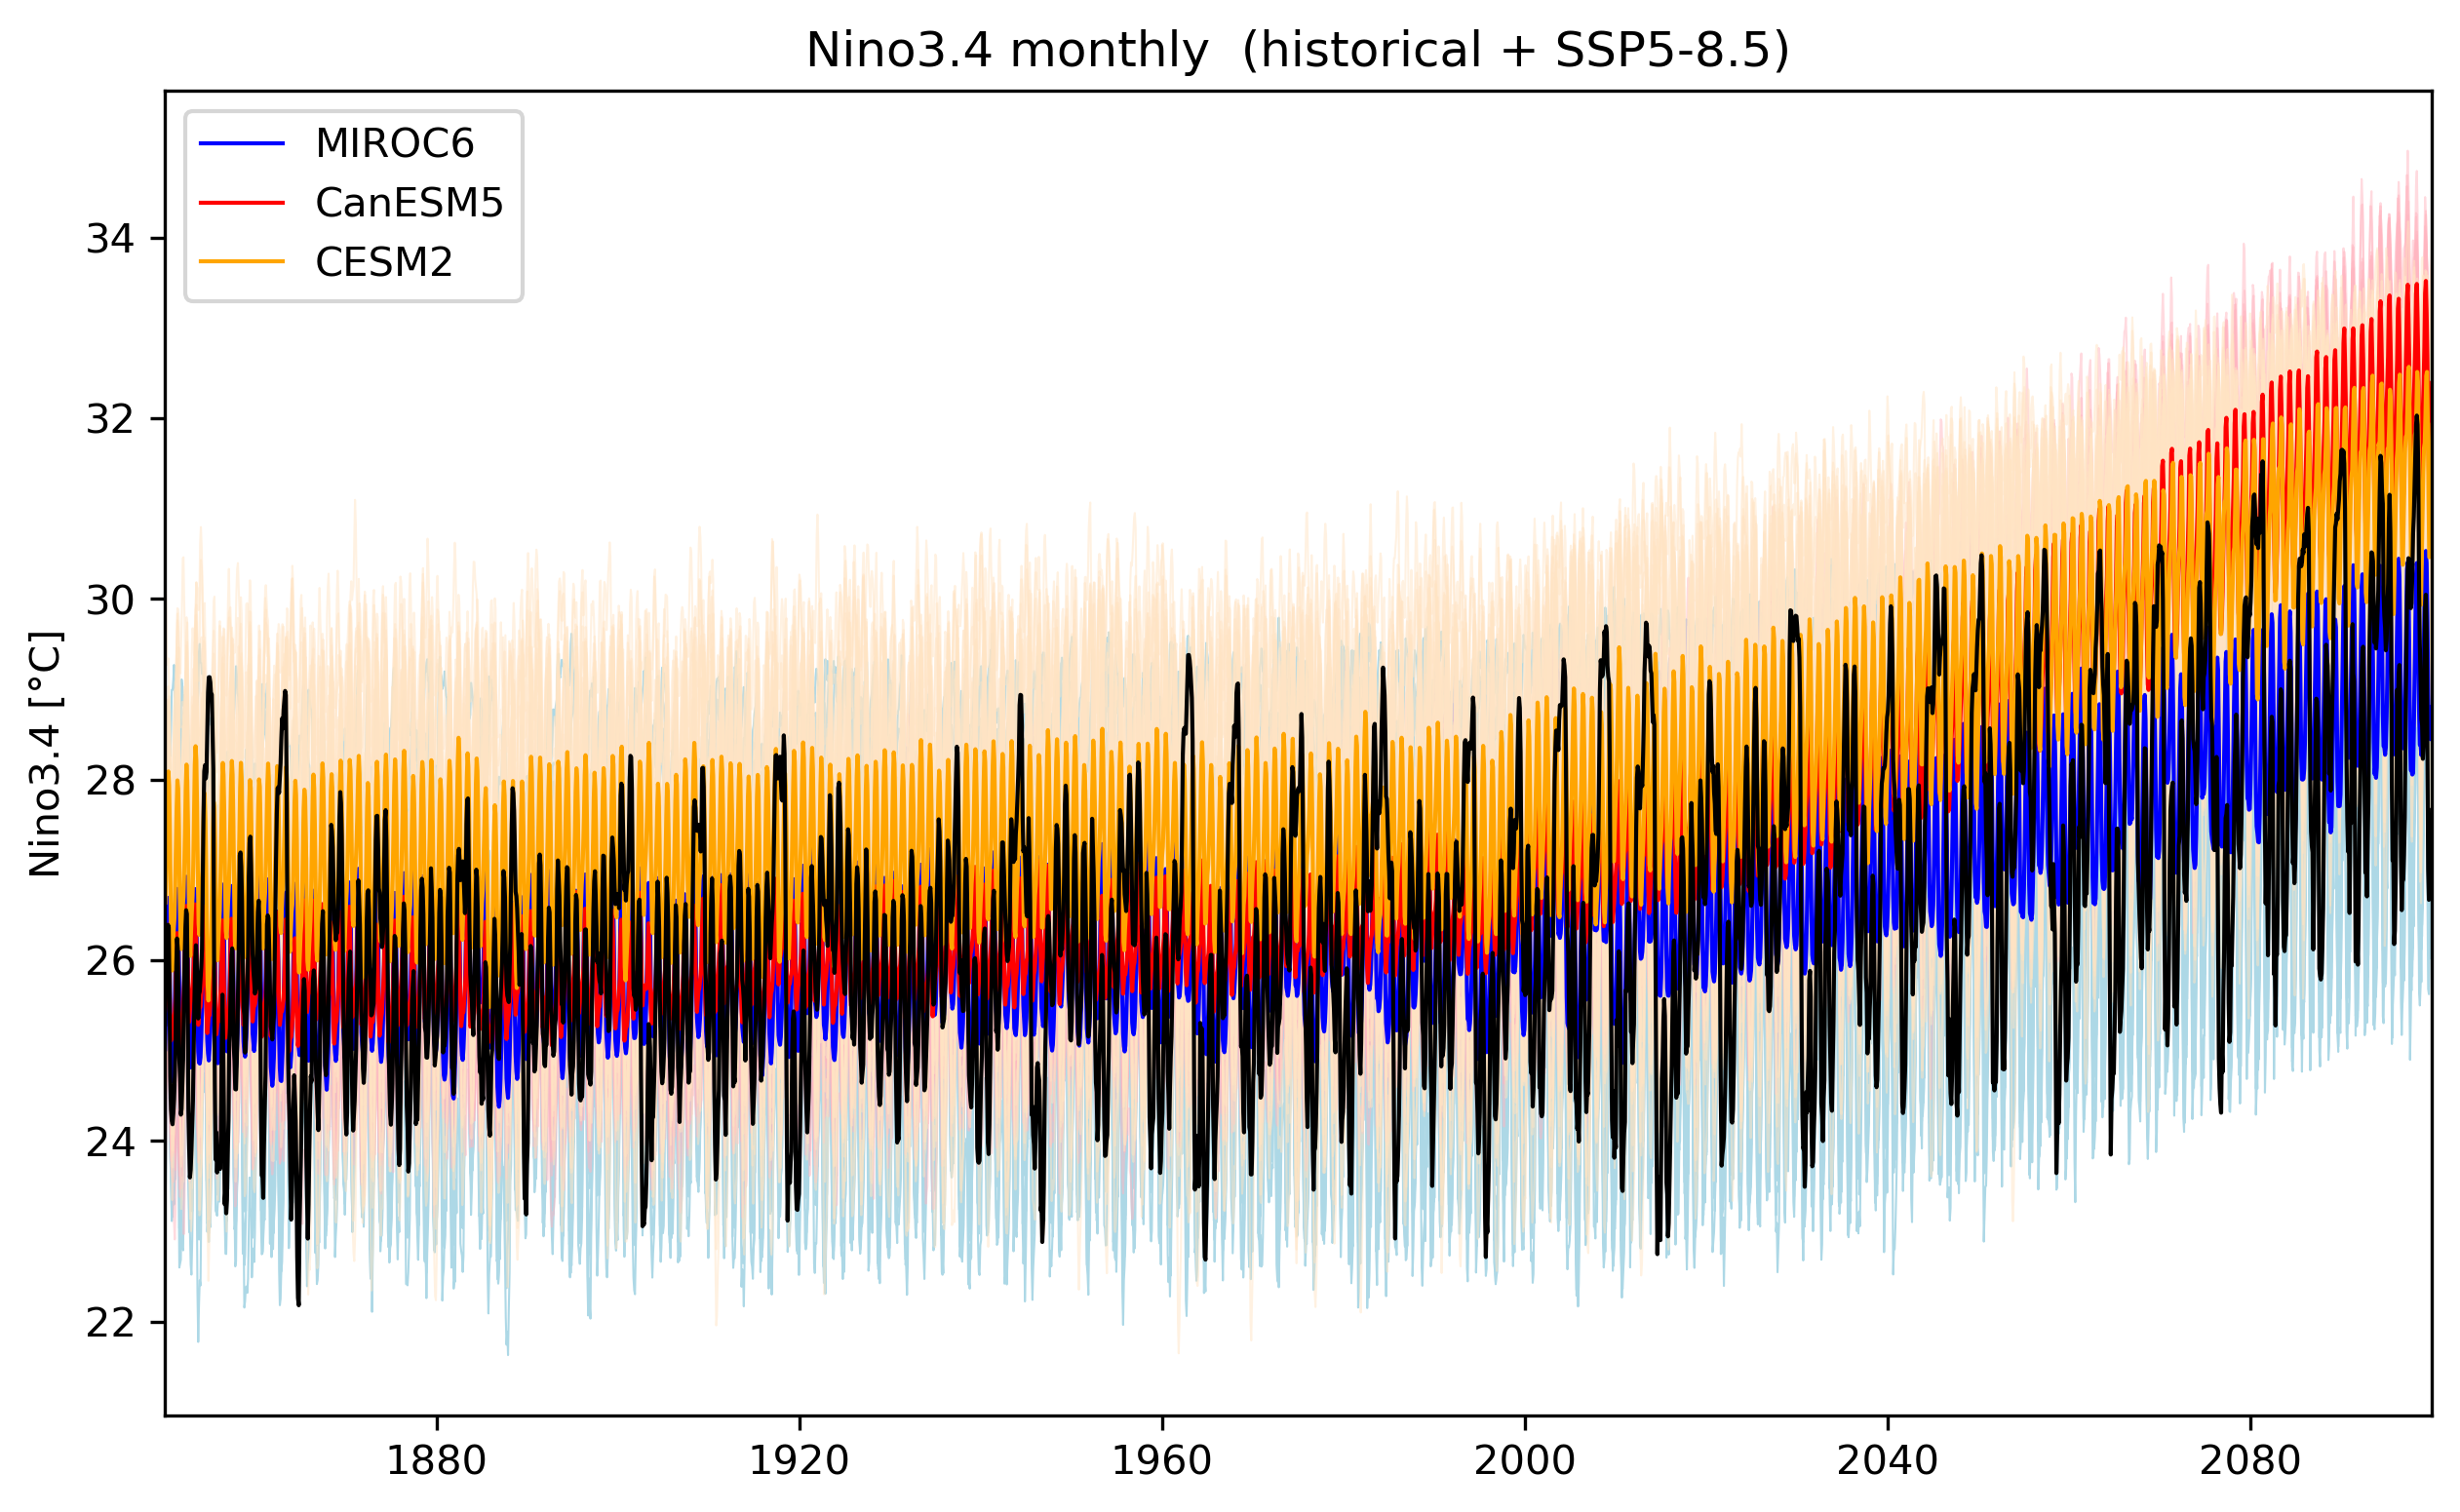

In [92]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34['time'].values,miroc6_nino34.transpose(),color='lightblue',linewidth=0.5);
plt.plot(canesm5_nino34['time'].values,canesm5_nino34.transpose(),color='lightpink',alpha=0.5,linewidth=0.5);
plt.plot(cesm2_nino34['time'].values,cesm2_nino34.transpose(),color='bisque',alpha=0.5,linewidth=0.5);

plt.plot(miroc6_nino34['time'].values,miroc6_nino34.mean(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34['time'].values,canesm5_nino34.mean(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34['time'].values,cesm2_nino34.mean(dim='ensemble'),color='orange',linewidth=1,label='CESM2');



plt.legend()
plt.title('Nino3.4 monthly  (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_monthly.png', bbox_inches='tight', dpi=300)

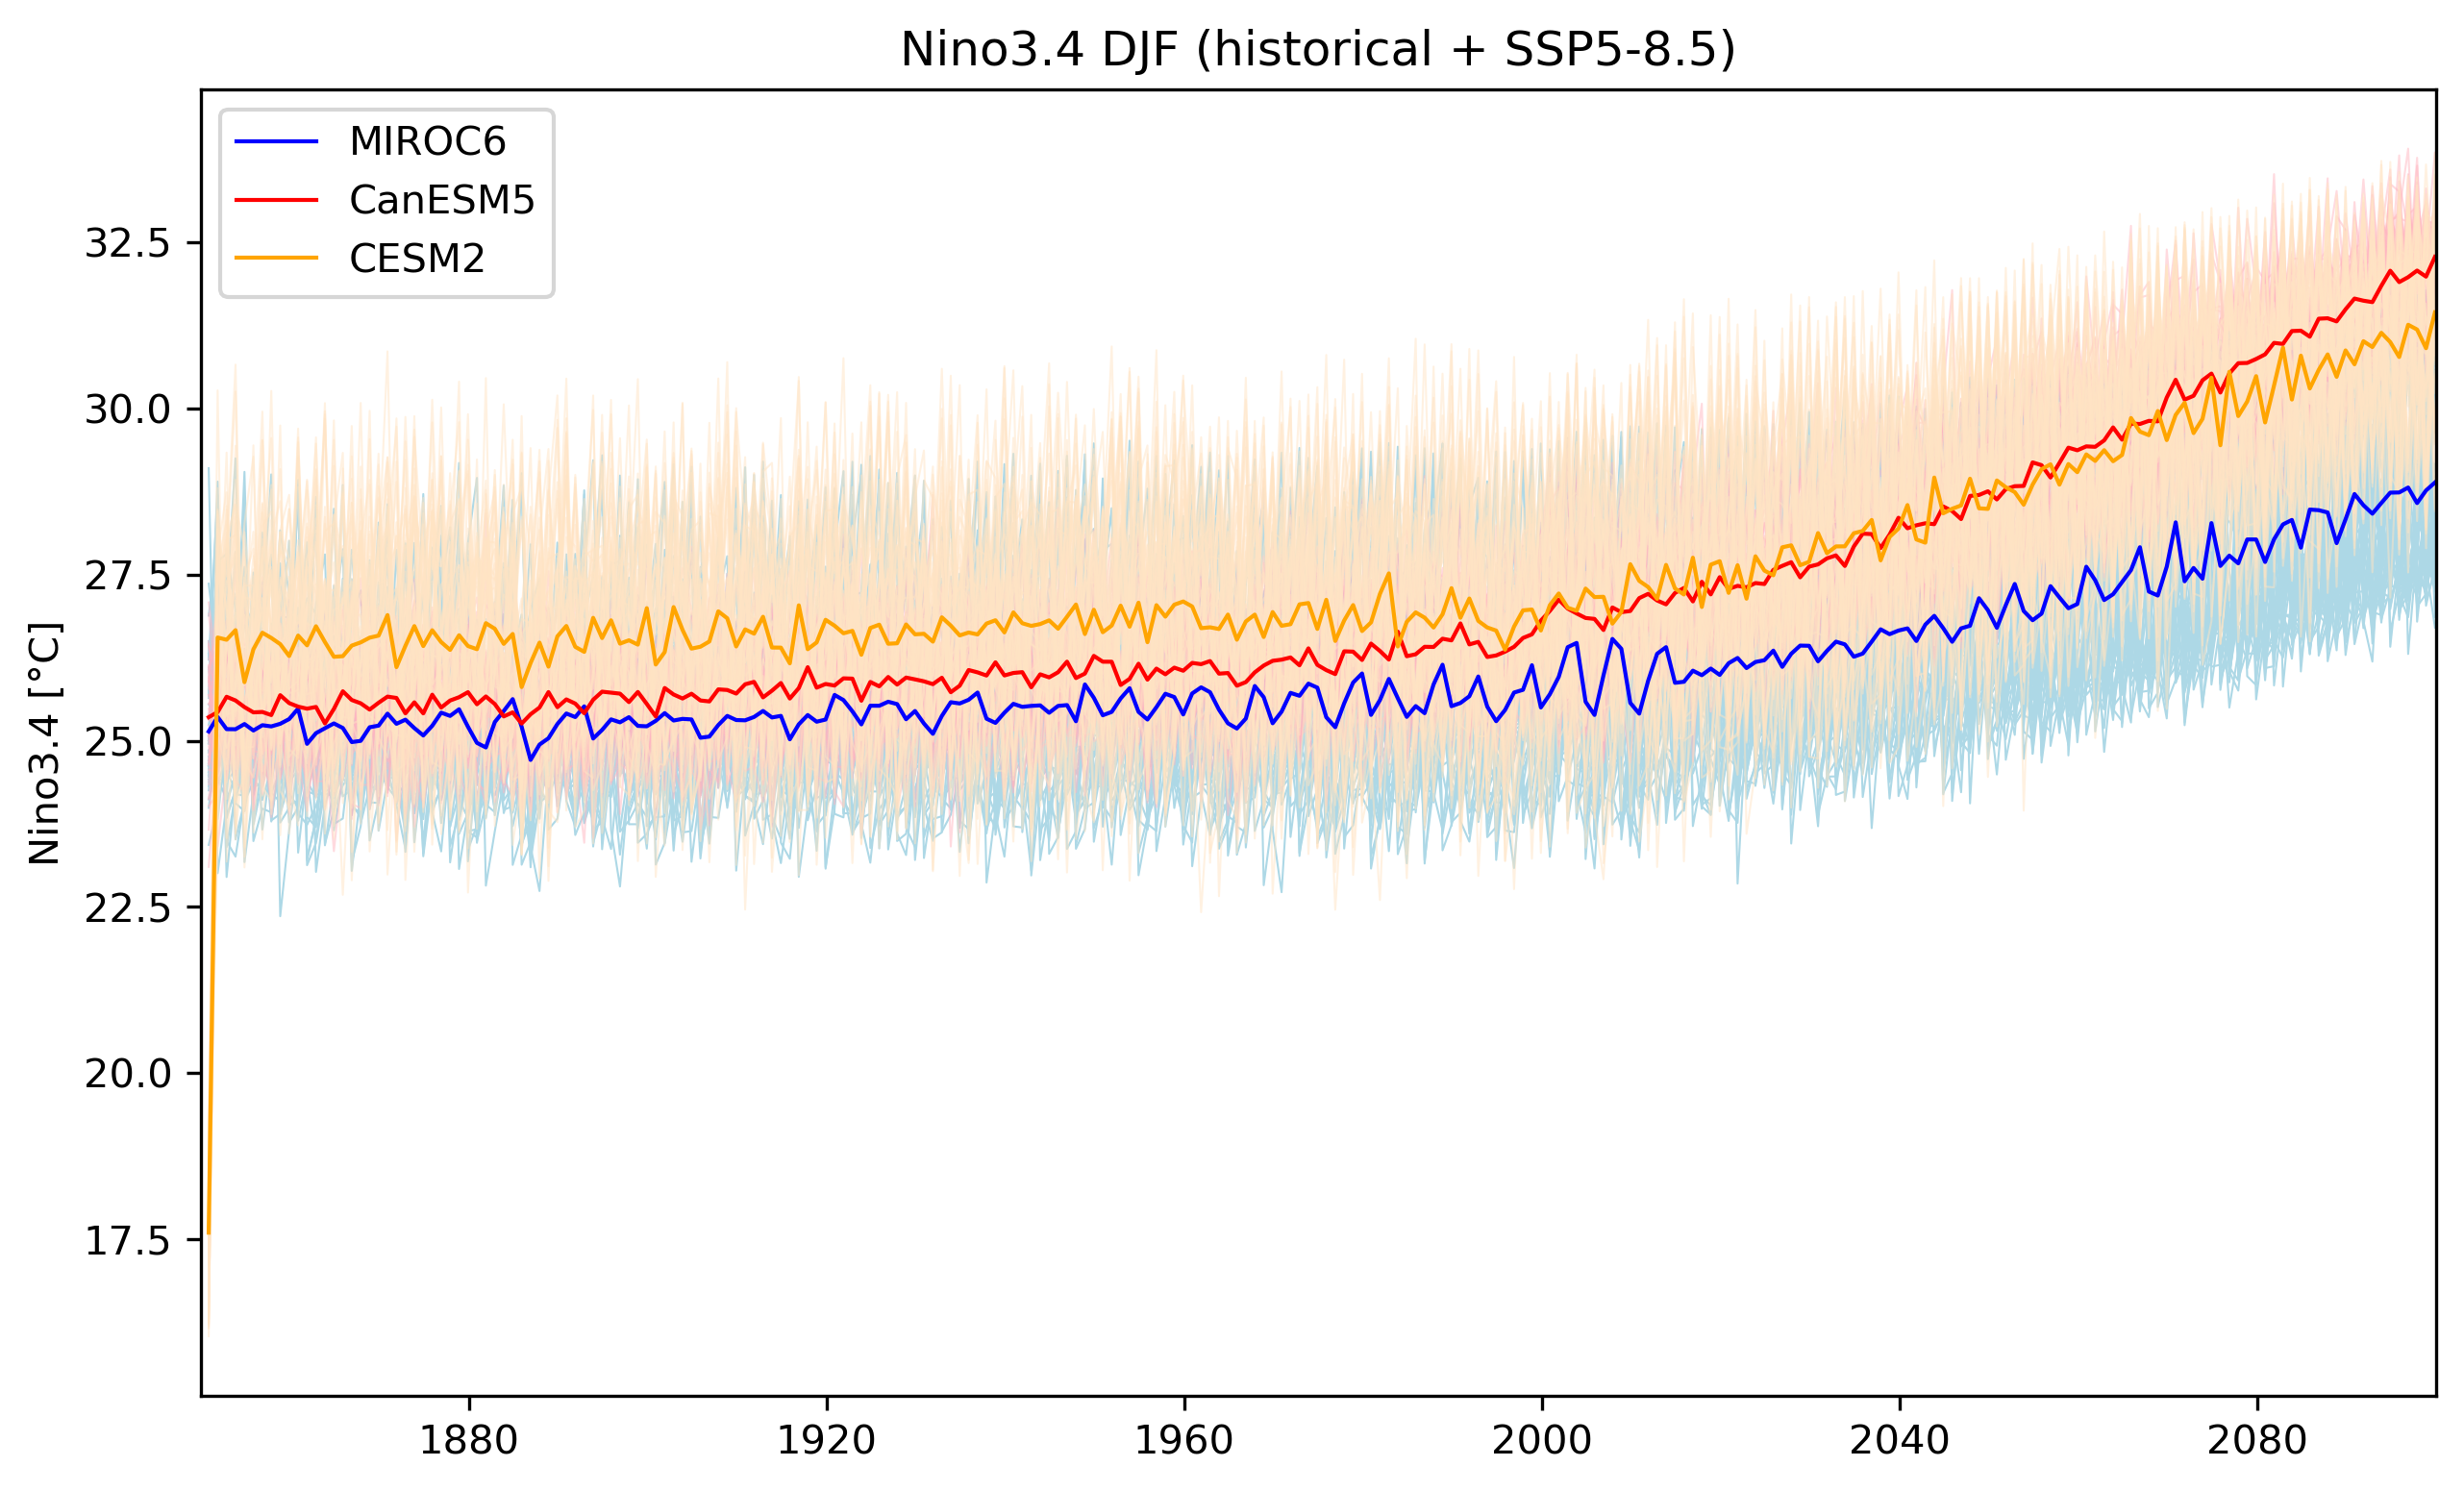

In [94]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.transpose(),color='lightblue',linewidth=0.5);
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.transpose(),color='lightpink',linewidth=0.5,alpha=0.5);
plt.plot(cesm2_nino34_DJF['time'].values,cesm2_nino34_DJF.transpose(),color='bisque',linewidth=0.5,alpha=0.5);

plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.mean(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.mean(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34_DJF['time'].values,cesm2_nino34_DJF.mean(dim='ensemble'),color='orange',linewidth=1,label='CESM2');



plt.legend()
plt.title('Nino3.4 DJF (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_DJF.png', bbox_inches='tight', dpi=300)

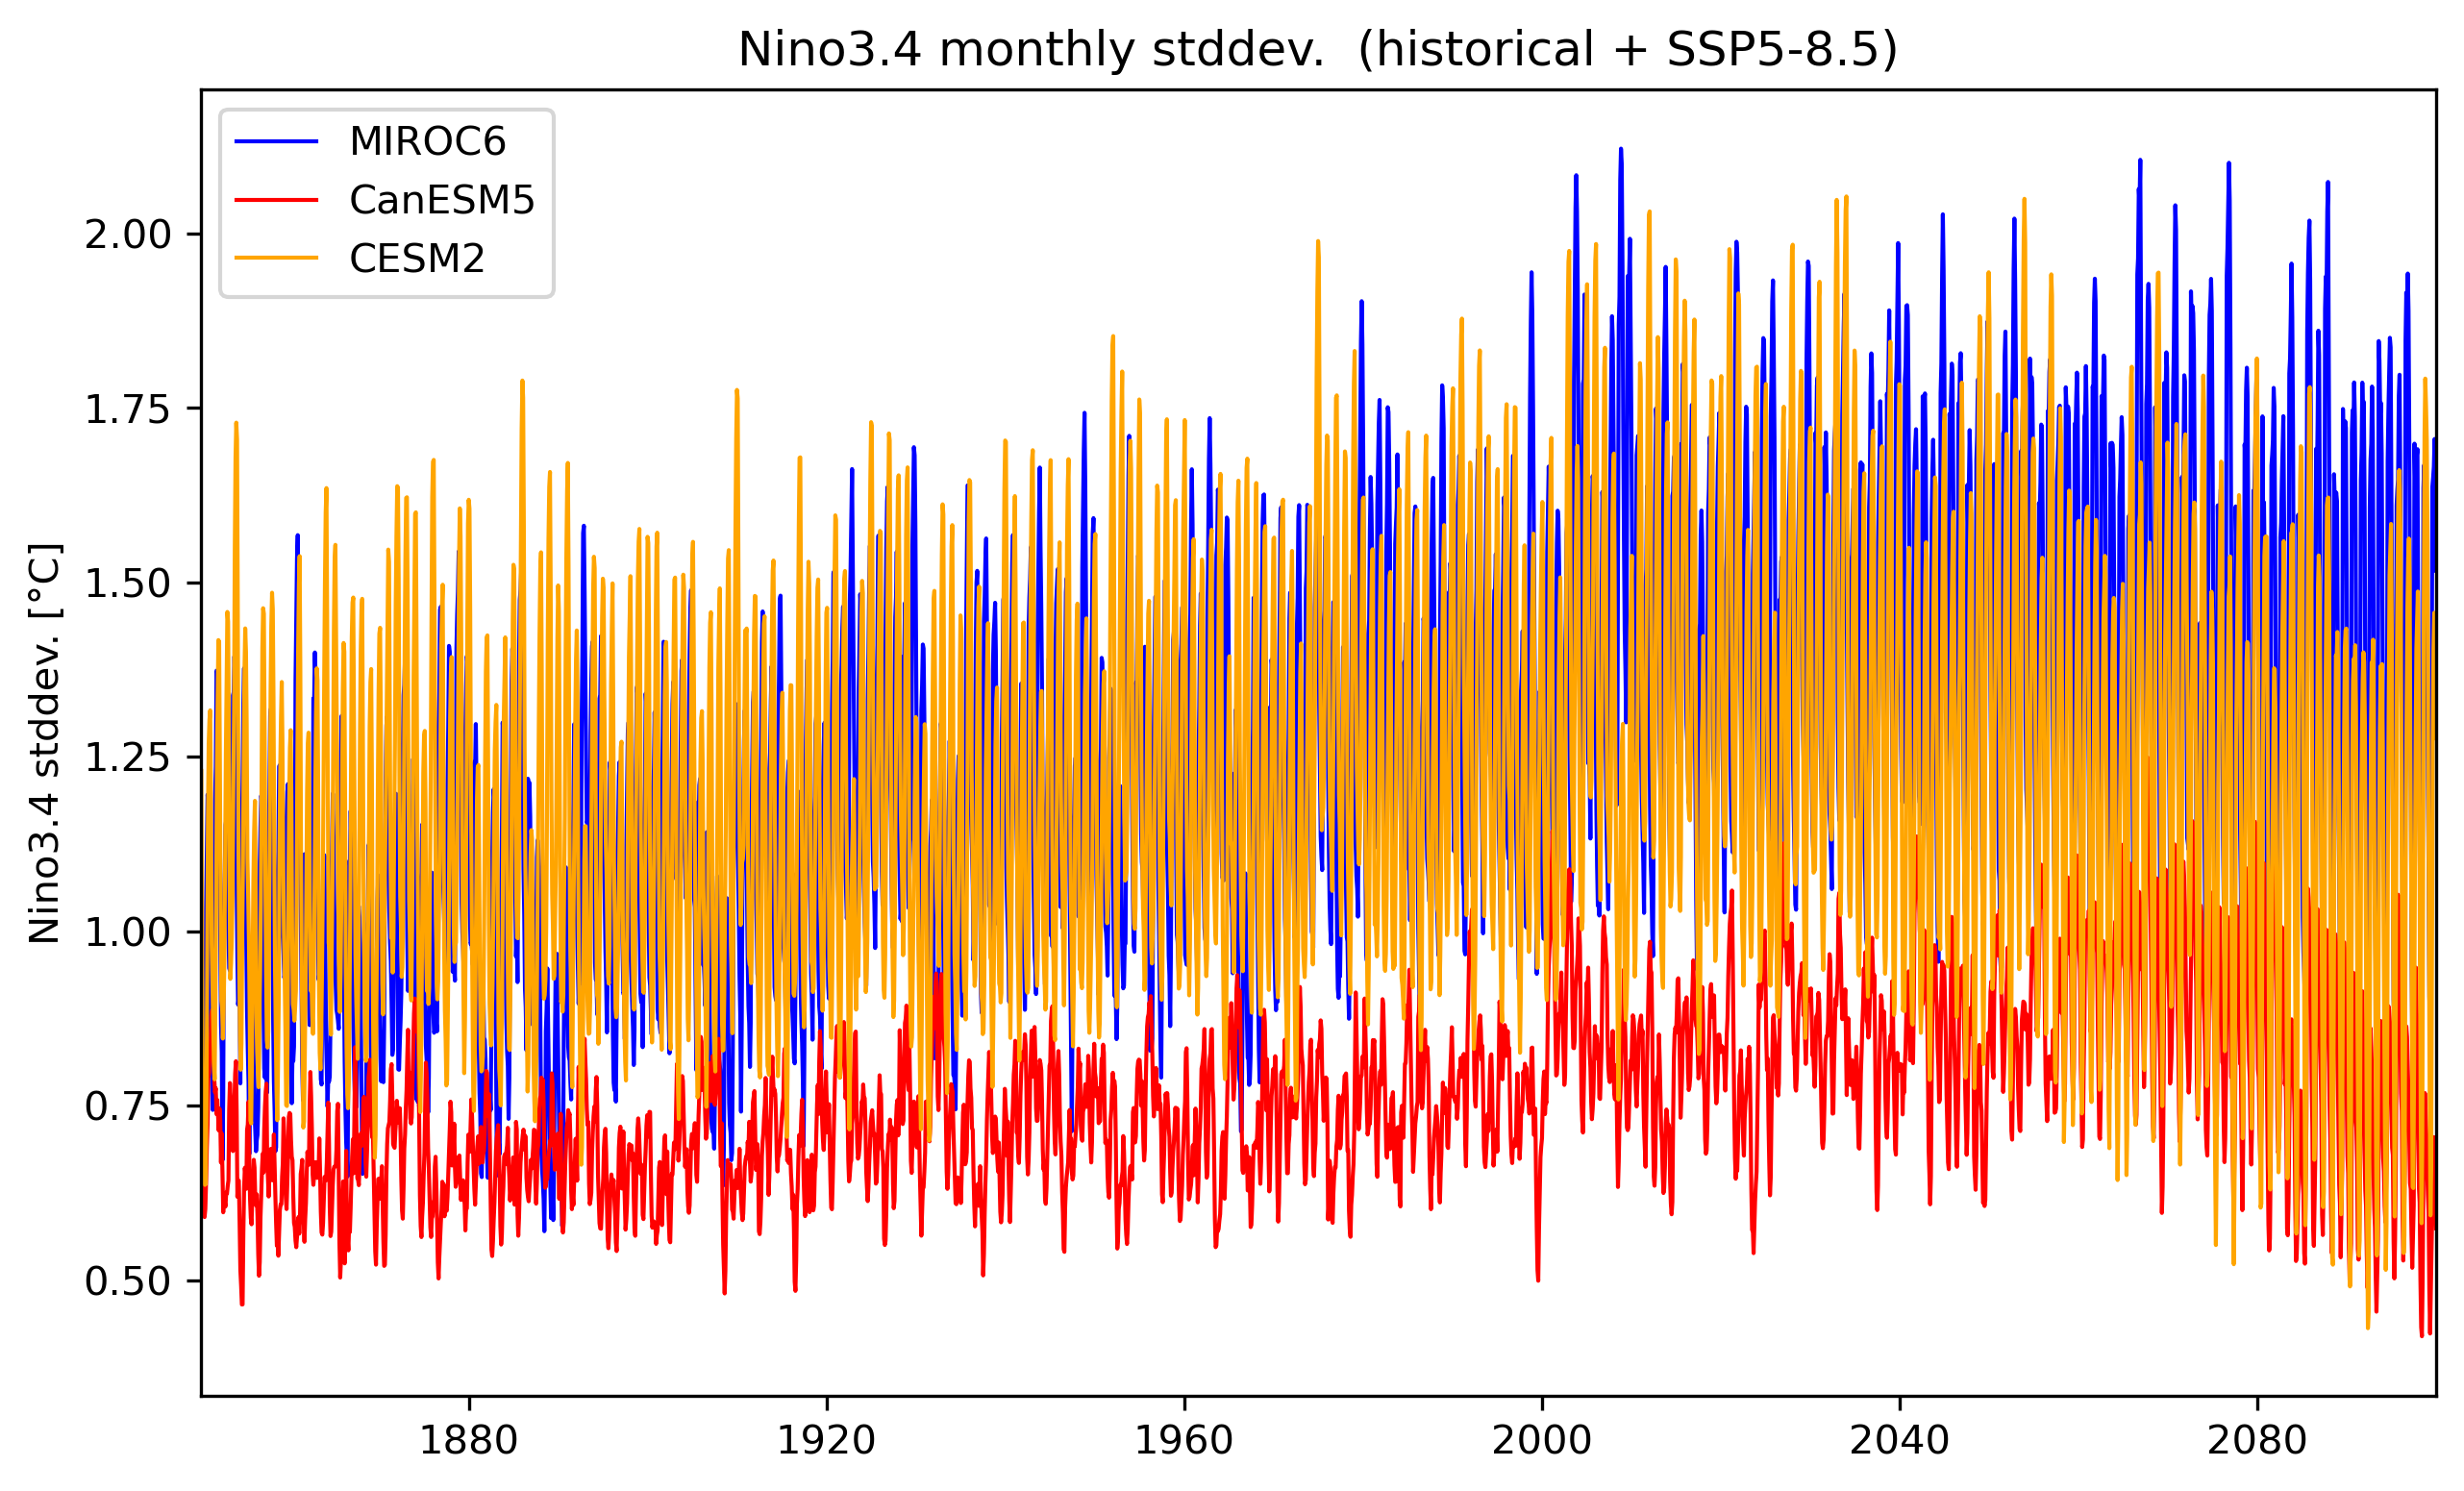

In [90]:
# time series
plt.figure(figsize=(10, 6), dpi=300)


plt.plot(miroc6_nino34['time'].values,miroc6_nino34.std(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34['time'].values,canesm5_nino34.std(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34['time'].values,cesm2_nino34.std(dim='ensemble'),color='orange',linewidth=1,label='CESM2');


plt.legend()
plt.title('Nino3.4 monthly stddev.  (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_monthly_stddev.png', bbox_inches='tight', dpi=300)

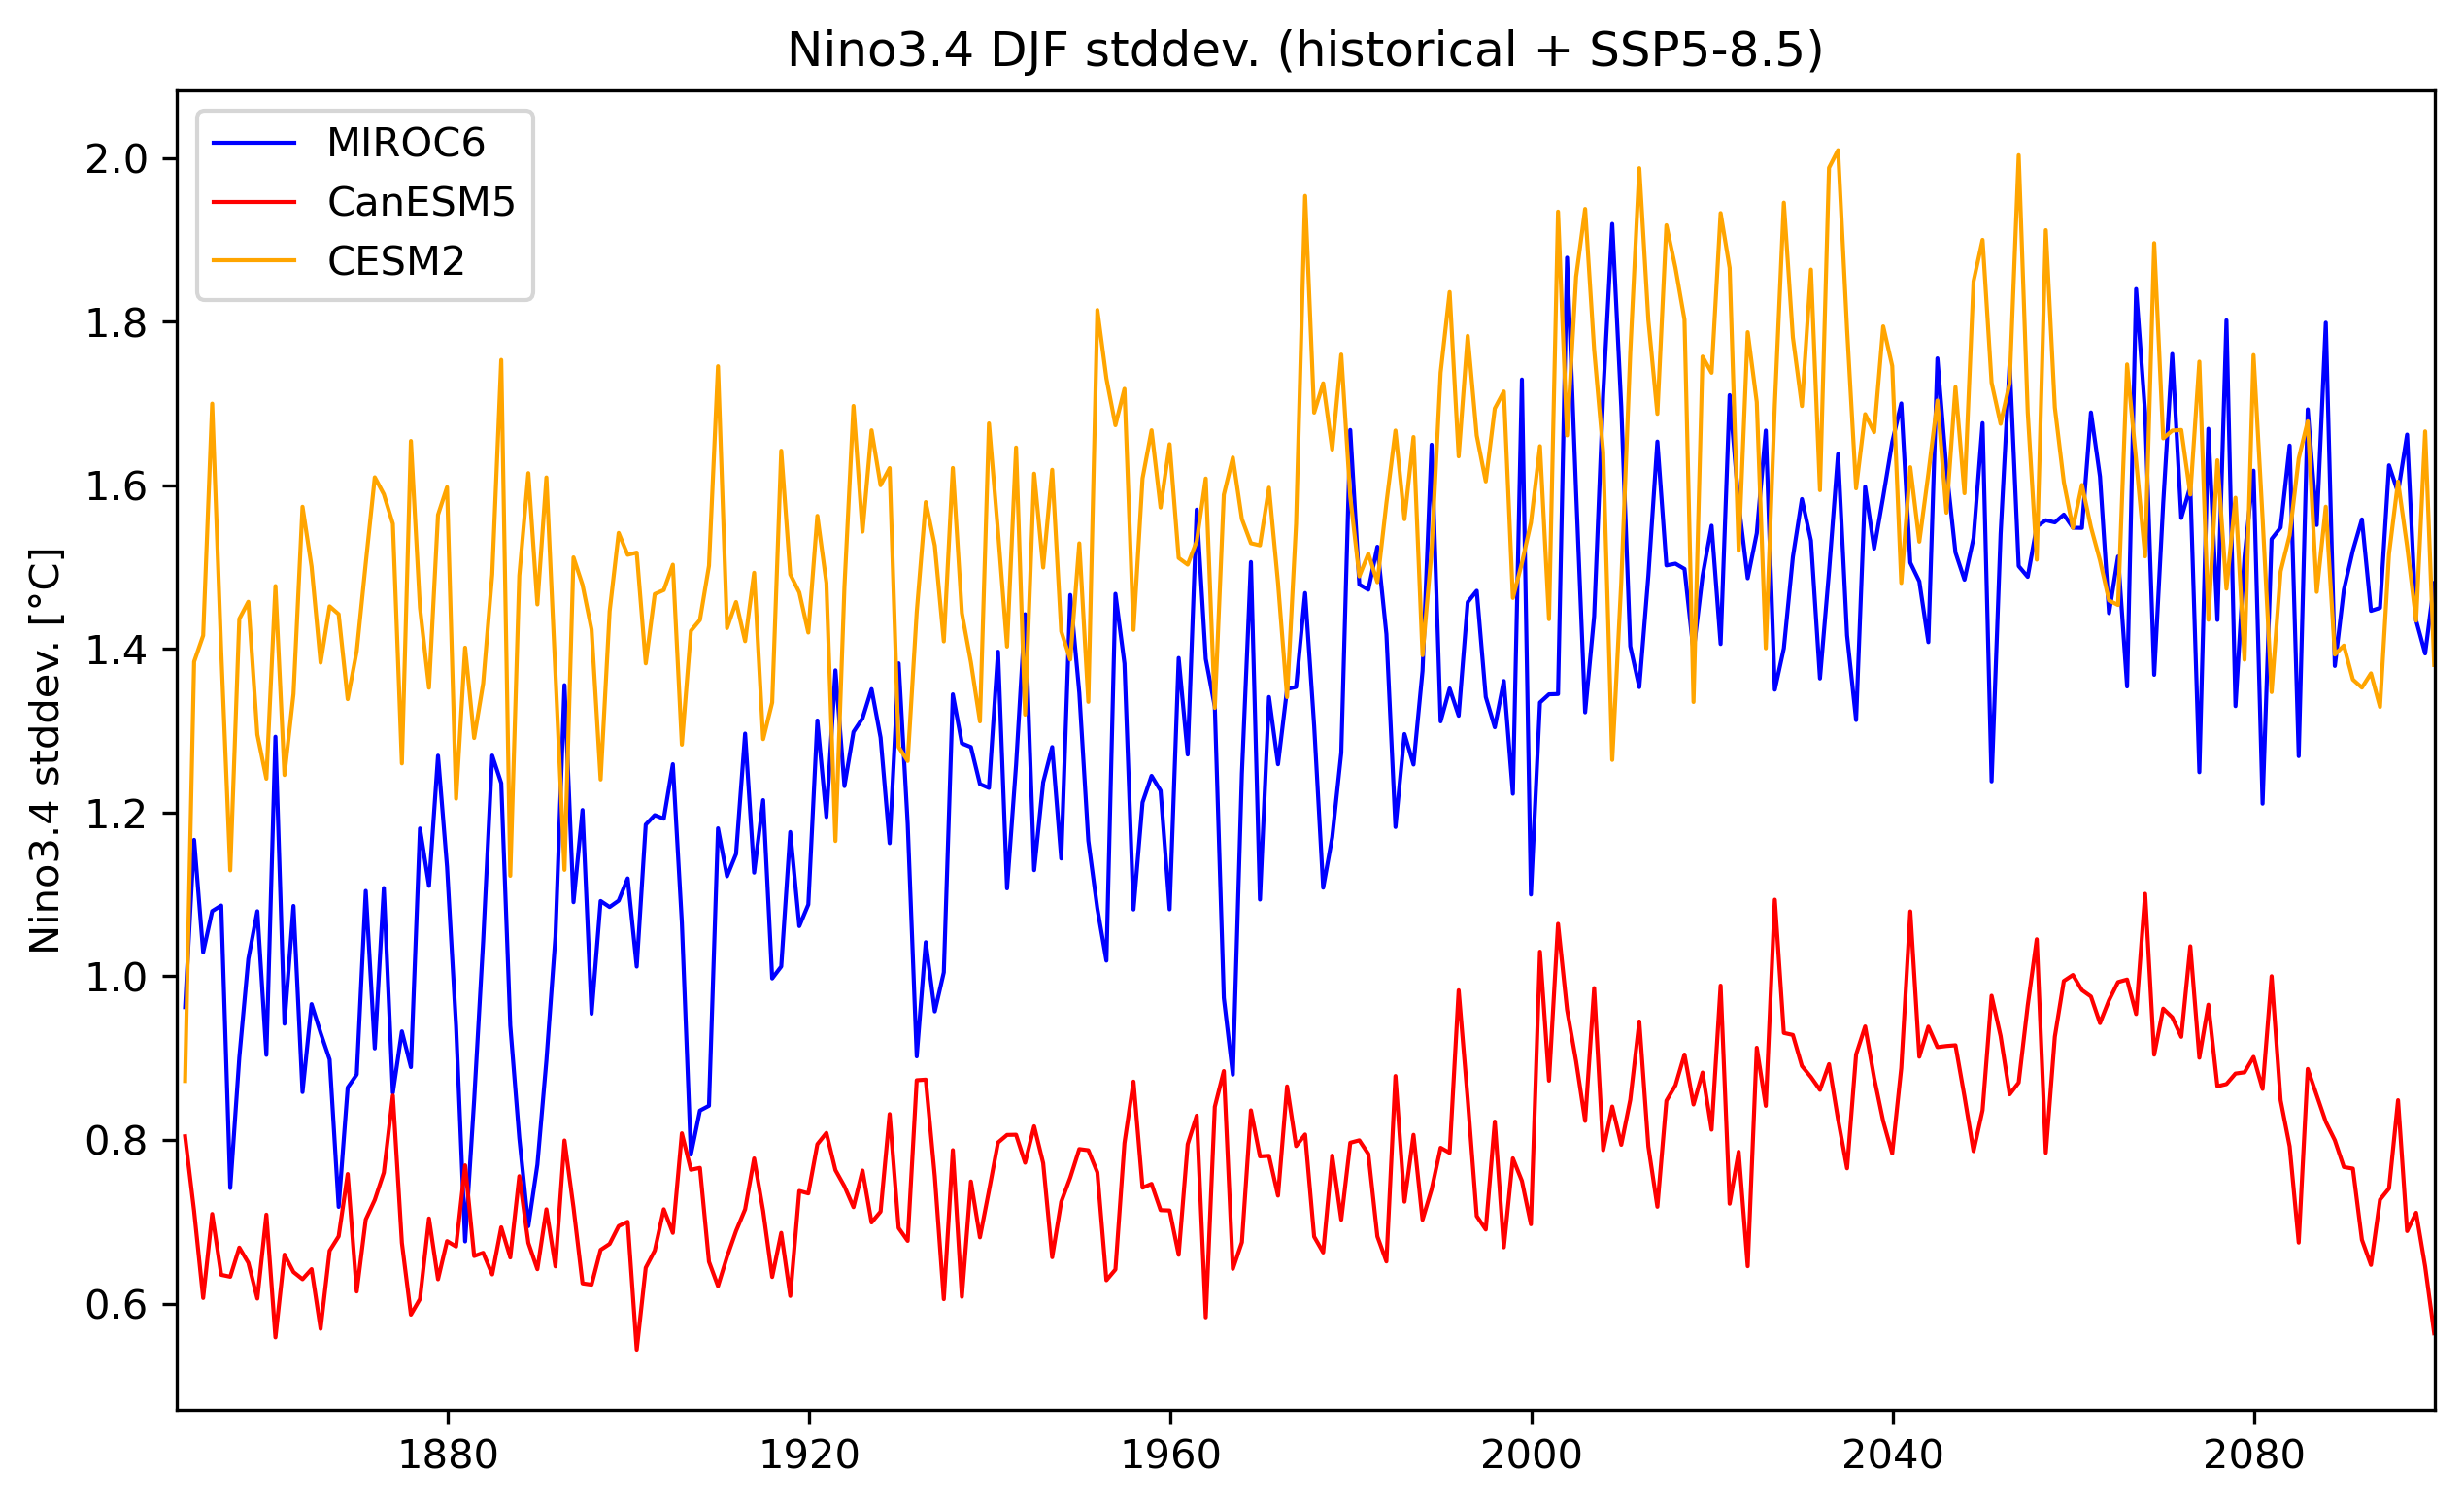

In [91]:
# time series
plt.figure(figsize=(10, 6), dpi=300)


plt.plot(miroc6_nino34_DJF['time'].values,miroc6_nino34_DJF.std(dim='ensemble'),color='blue',linewidth=1,label='MIROC6');
plt.plot(canesm5_nino34_DJF['time'].values,canesm5_nino34_DJF.std(dim='ensemble'),color='red',linewidth=1,label='CanESM5');
plt.plot(cesm2_nino34_DJF['time'].values,cesm2_nino34_DJF.std(dim='ensemble'),color='orange',linewidth=1,label='CESM2');



plt.legend()
plt.title('Nino3.4 DJF stddev. (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'nino34_DJF_stddev.png', bbox_inches='tight', dpi=300)

## std change by month

In [110]:
canesm_nino34_std_bymonth = canesm5_nino34.std(dim='ensemble').groupby('time.month')


Text(0, 0.5, 'Nino3.4 stddev. [°C]')

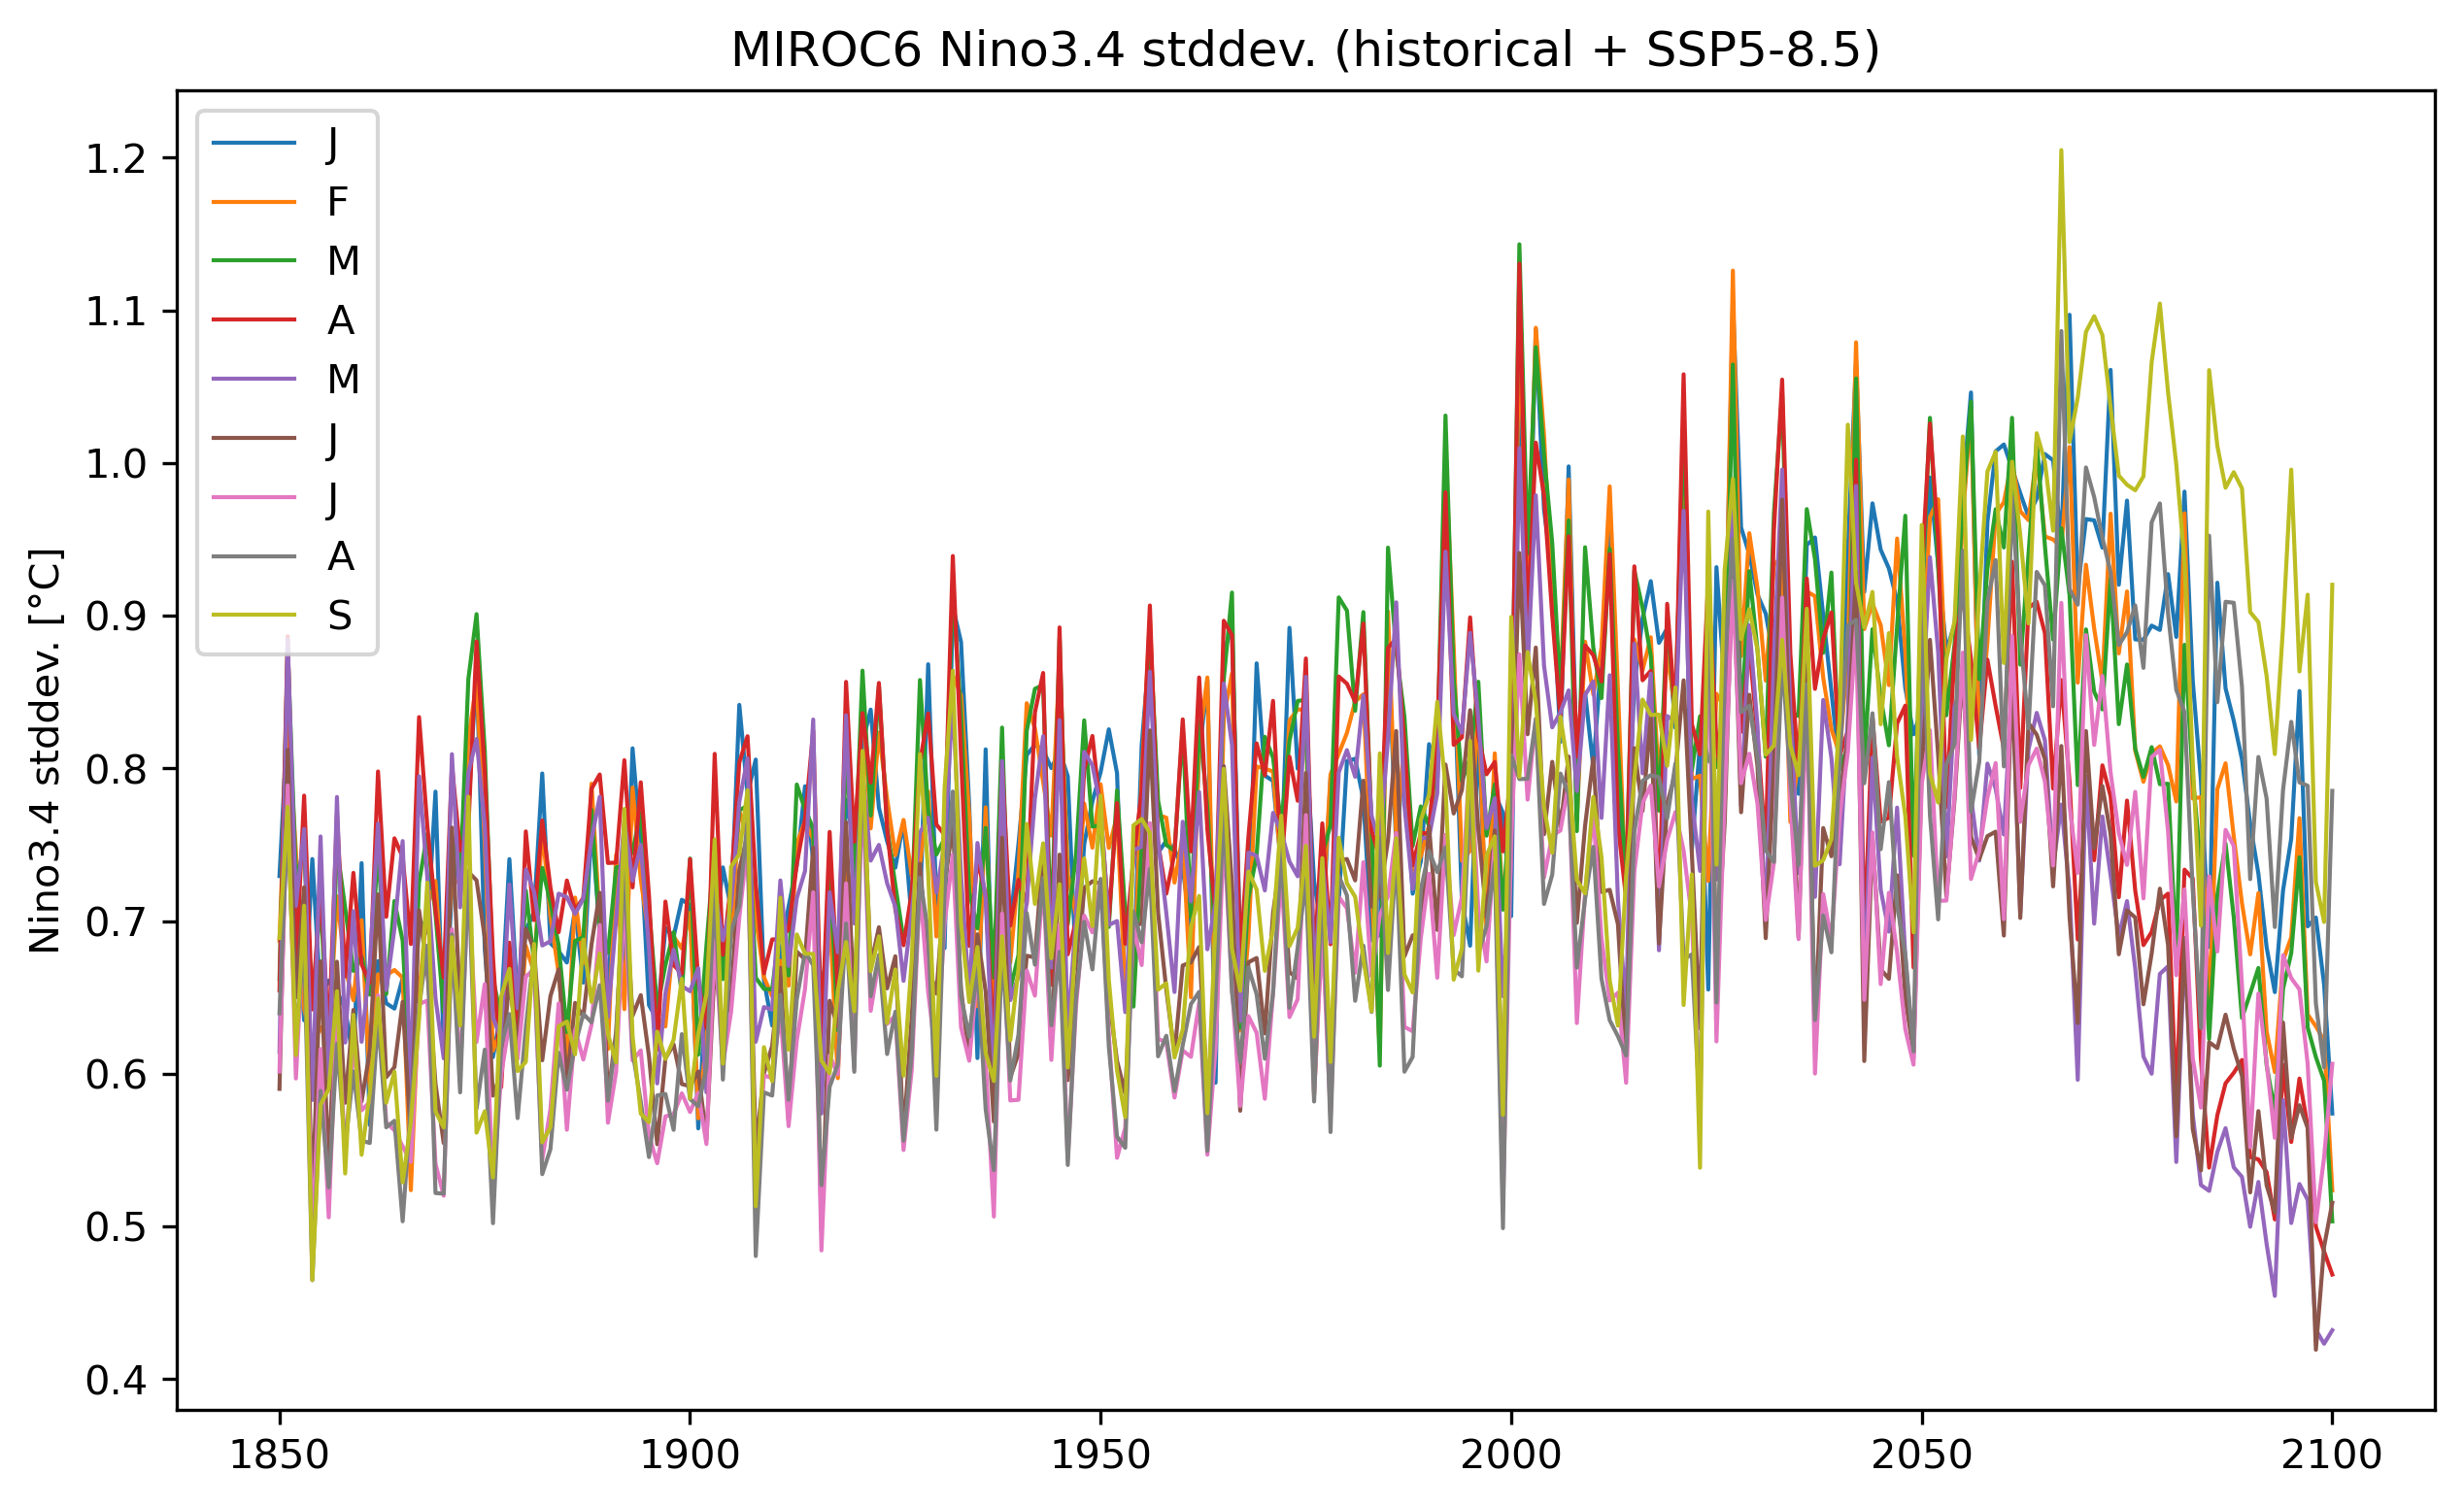

In [130]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

Months = ['J','F','M','A','M','J','J','A','S','O','N','D',]
for i in range(1,10):
    plt.plot(np.arange(1850,2101,1),canesm_nino34_std_bymonth[i].rolling(time=1, center=True).mean(),linewidth=1,label=Months[i-1]);



plt.legend()
plt.title('MIROC6 Nino3.4 stddev. (historical + SSP5-8.5)')

plt.ylabel('Nino3.4 stddev. [°C]')
# plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

# plt.savefig(plotdir+'nino34_DJF_stddev.png', bbox_inches='tight', dpi=300)

In [138]:
test = np.array([canesm_nino34_std_bymonth[1],
          canesm_nino34_std_bymonth[2],
          canesm_nino34_std_bymonth[3],
          canesm_nino34_std_bymonth[4],
          canesm_nino34_std_bymonth[5],
          canesm_nino34_std_bymonth[6],
          canesm_nino34_std_bymonth[7],
          canesm_nino34_std_bymonth[8],
          canesm_nino34_std_bymonth[9],
          canesm_nino34_std_bymonth[10],
          canesm_nino34_std_bymonth[11],
          canesm_nino34_std_bymonth[12]
          ])

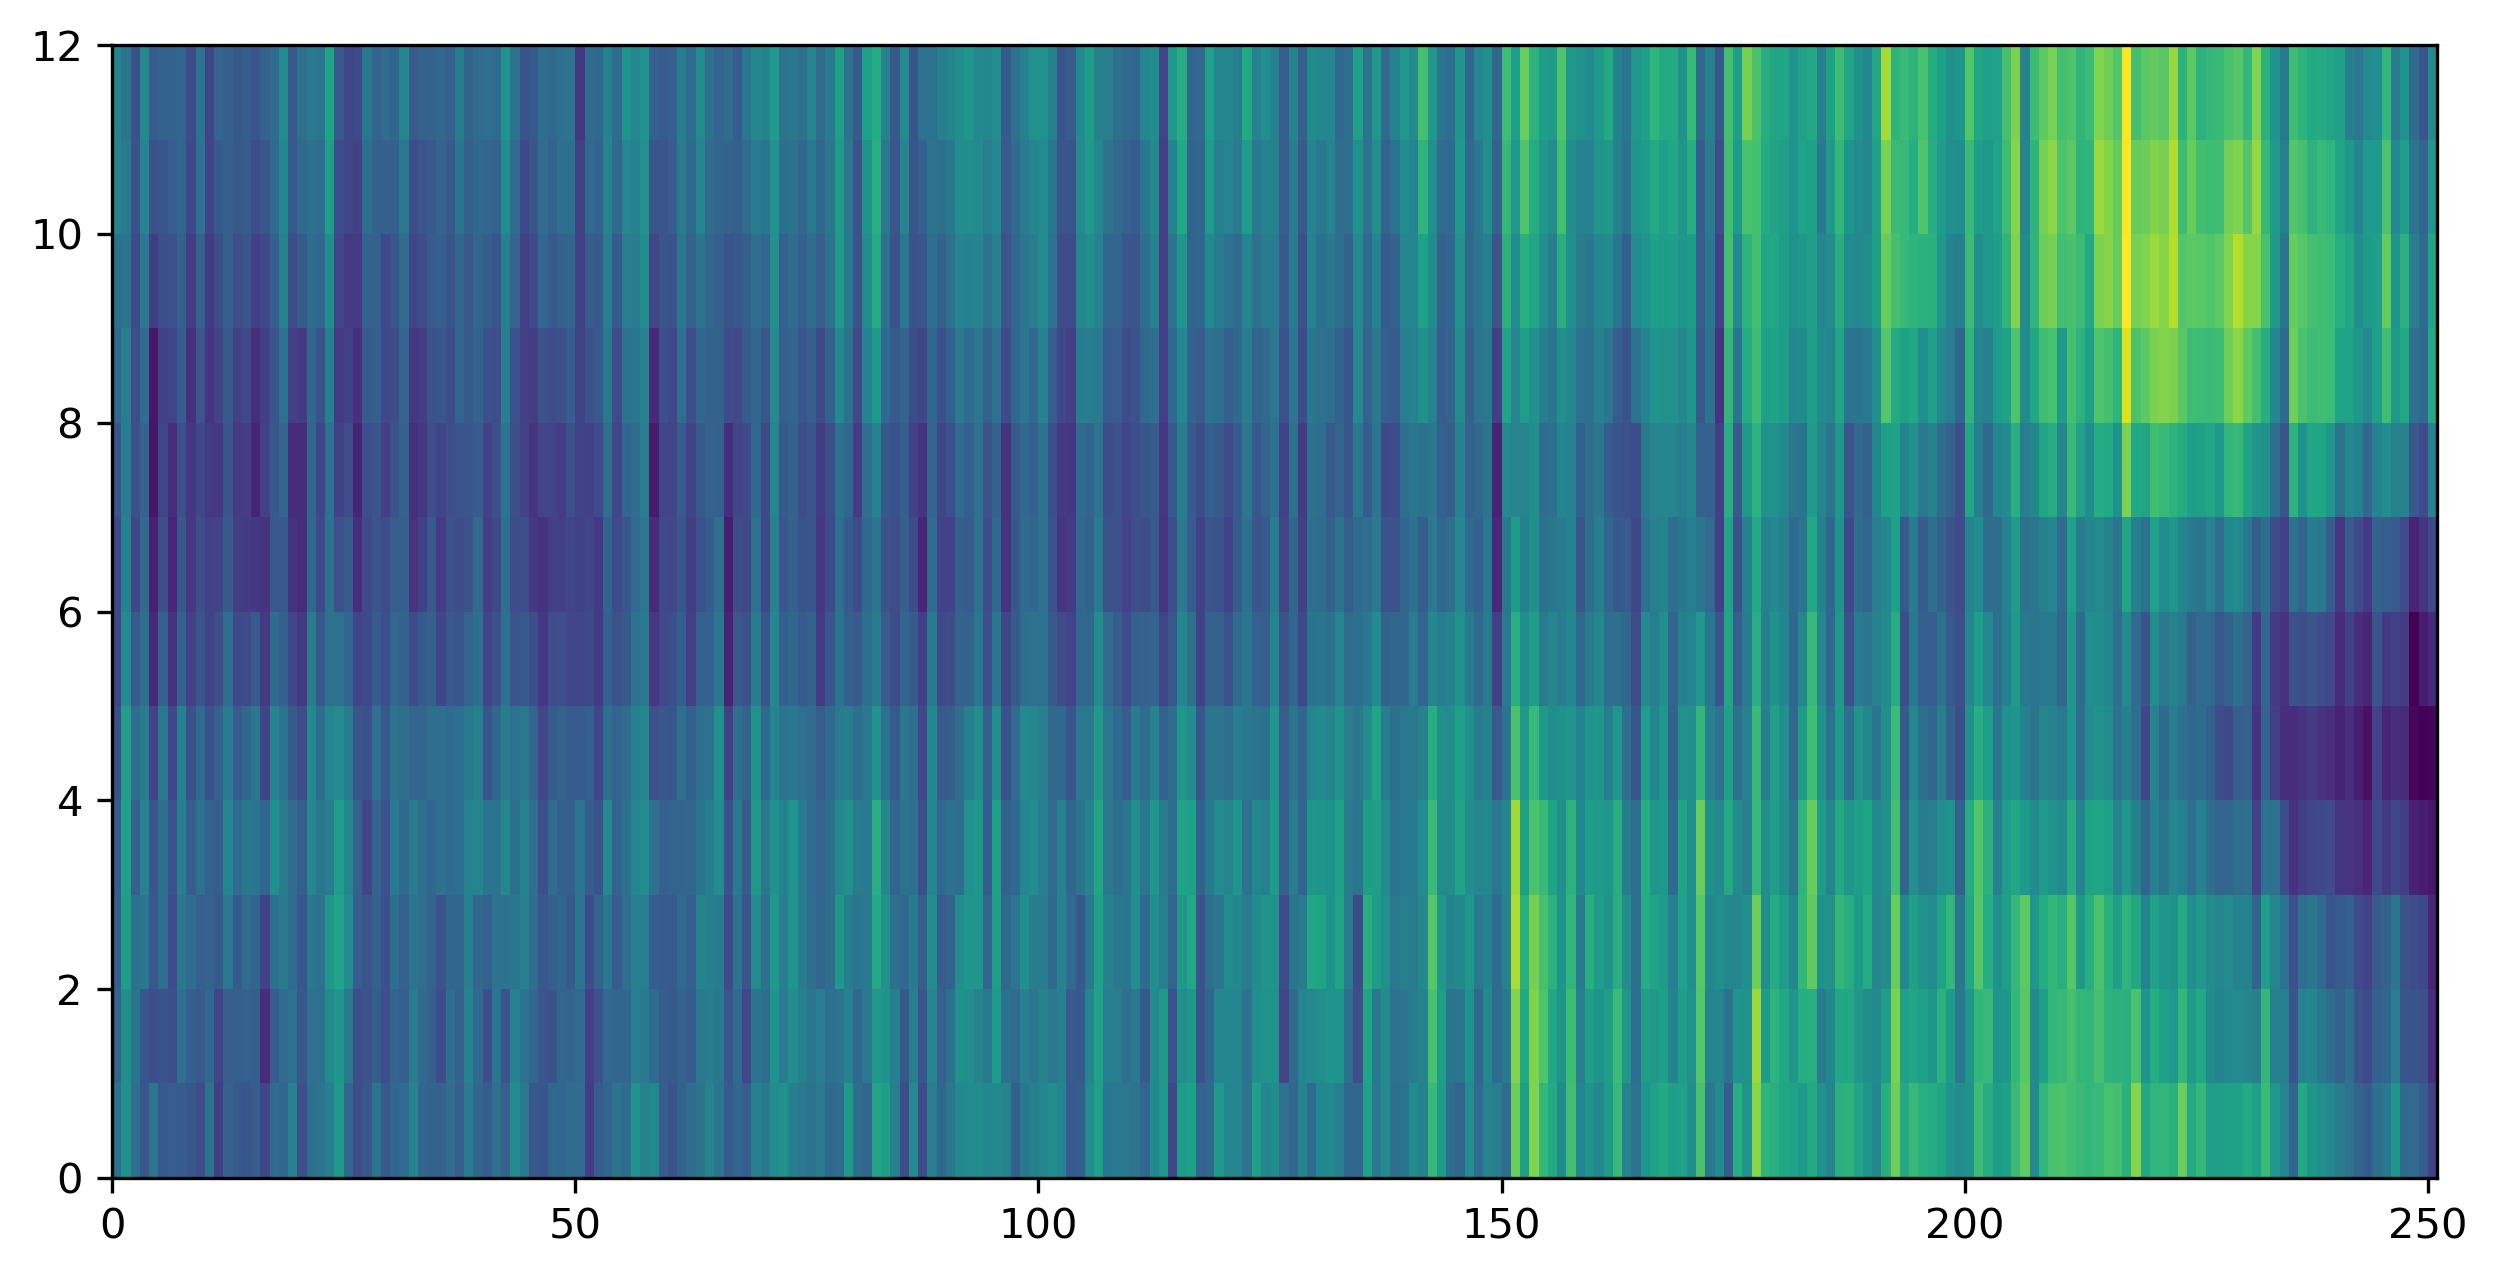

In [145]:
plt.figure(figsize=(10, 5), dpi=300)
plt.pcolormesh(test)